# Unbound system
<img src="animation1_u.gif" width="500" align="right">
<br>
We hereby present a simulation of an unbound system of two stars with different masses $m_1 = 100\ \text{IU}$ and $m_2 = 1\ \text{IU}$ with IU = Internal Units both resting on the plane $x\ y$, the first mass is initially at rest on the origin while the second one is approaching with velocit $v_x = 4 \ \text{IU}$. <br>
In this brief overview we tried to show the results one can infer by comparing the simulated behaviour of a bound system with the Analytical Solution provided by Newton

## Initial data choice
To better understand the choice of our initial datas, we first have to show the conversion we used to go from Internal Units to the cgs system.<br>
From the definition of *centripetal force*<br><br>
$$ f_\text{cp} = \dfrac{v^2}{r} = \dfrac{GM}{r^2}$$
<br>
we define the following *adimensional quantity* for our conversion
<br><br>
$$ \bigg(\dfrac{GM}{rv^2}\bigg)_\text{iu} = \bigg(\dfrac{GM}{rv^2}\bigg)_\text{cgs} $$
<br>
Since the quantity is derived from the centripetal force we decided to use the mass ratios and distance from the Earth-Sun system, interpreting $m_\text{iu} = 1 = 1\ M_\odot$. From which
$$
\dfrac{m_\text{cgs}}{m_\text{iu}} = 2 \times 10^{33} \qquad \dfrac{r_\text{cgs}}{r_\text{iu}} = 1.49 \times 10^{13}
$$
From which we find
$$
\dfrac{v_\text{cgs}}{v_\text{iu}} = 3 \times 10^6\
$$

### Intepreting the data

The initial data set that we have chosen to simulate a bound system is the following, expressed in internal units:

| Object | Mass      |   x   |   y   |   z   |    vx    |    vy    |   vz     |
|--------|-----------|-------|-------|-------|----------|----------|----------|
|   1    |   100     |   0   |   0   |   0   |     0    |     0    |    0     |
|   2    |     1     |  -20  |  15   |   0   |     4    |     0    |    0     |


Which in cgs units translates to:

| Object | Mass (g) | x (cm)| y (cm) | z (cm) | v_x (cm/s) | v_y (cm/s) | v_z (cm/s) |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 2 x 10^35 | 0 | 7.4 x 10^12 | 0 | 0 | 0 | 0 |
| 2 | 2 x 10^33 | -3 x 10^14 | -2.2 x 10^14 | 0 | 1.2 x 10^7 | 0 | 0 |


We have set up the total time of the simulation to be of 20 IU and the ouput to be printed every 0.1 UI, to have enought data to be confronted with the theoretical model.
<br>

This represents a configuration of two masses that initially lie on the origin, opposite one to another on the y axis, with opposite velocities on the x axis, and with a net velocity on the z axis.

### Why is it an unbound state?
Generally, we can calculate wether a state is unbound or not by simply imposing the total energy to be positive $E > 0$.<br>
We will prove this by calculating the total energy as<br>

$$
E_\text{tot} = \sum_{i} \dfrac{1}{2}m_{i}v_i^2 - \sum_{i \ne j} G\ \dfrac{m_i m_j}{(\vec{r_i} - \vec{r_j})^2} \hat r_{ij}
$$

And comparing the result with the effective potential solution.

## Fetching the data
Data fetching and extrapolating is pretty strightforward, the variables pertaining the two objects will be stored in dictionaries

In [1]:
import numpy as np
import pandas as pd

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [2]:
lines = pd.read_csv('out_data_u.txt').to_numpy()

t = lines[0::4].astype(float)
a_1 = lines[1::4]
a_2 = lines[2::4]
N_particles = lines[3::4].astype(int)

mxv_1 = np.array([x.split(' ') for x in a_1.ravel()],dtype=float)
mxv_2 = np.array([x.split(' ') for x in a_2.ravel()],dtype=float)

print(t.shape)
#print(mxv_1)
#print(mxv_2)
#print(N_particles)

(200, 1)


Here we reshape the strings mxv_1 and mxv_2 and store their quantities in the dictionaries

In [3]:
m_1 = {
    "m": mxv_1[:,0][0],
    "x": mxv_1[:,1:4][:,0],
    "y": mxv_1[:,1:4][:,1],
    "z": mxv_1[:,1:4][:,2],
    "pos": mxv_1[:,1:4],
    "v_x": mxv_1[:,4:8][:,0],
    "v_y": mxv_1[:,4:8][:,1],
    "v_z": mxv_1[:,4:8][:,2],
    "vel": mxv_1[:,4:8]
}

m_2 = {
    "m": mxv_2[:,0][0],
    "x": mxv_2[:,1:4][:,0],
    "y": mxv_2[:,1:4][:,1],
    "z": mxv_2[:,1:4][:,2],
    "pos": mxv_2[:,1:4],
    "v_x": mxv_2[:,4:8][:,0],
    "v_y": mxv_2[:,4:8][:,1],
    "v_z": mxv_2[:,4:8][:,2],
    "vel": mxv_2[:,4:8]
}

#print(m_1["z"])

## Results
We can use basic physics concept to calculate the important physical quantities out of this simulation to better understand what we are seeing.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

## Separation Distance
As the name says, here the distance $d$ between the two objects is computed and later plotted as a function of time. Notice that in this case the distance is gonna go to infinity and not oscilates between the maximum value at apocenter and the minimum at pericenter

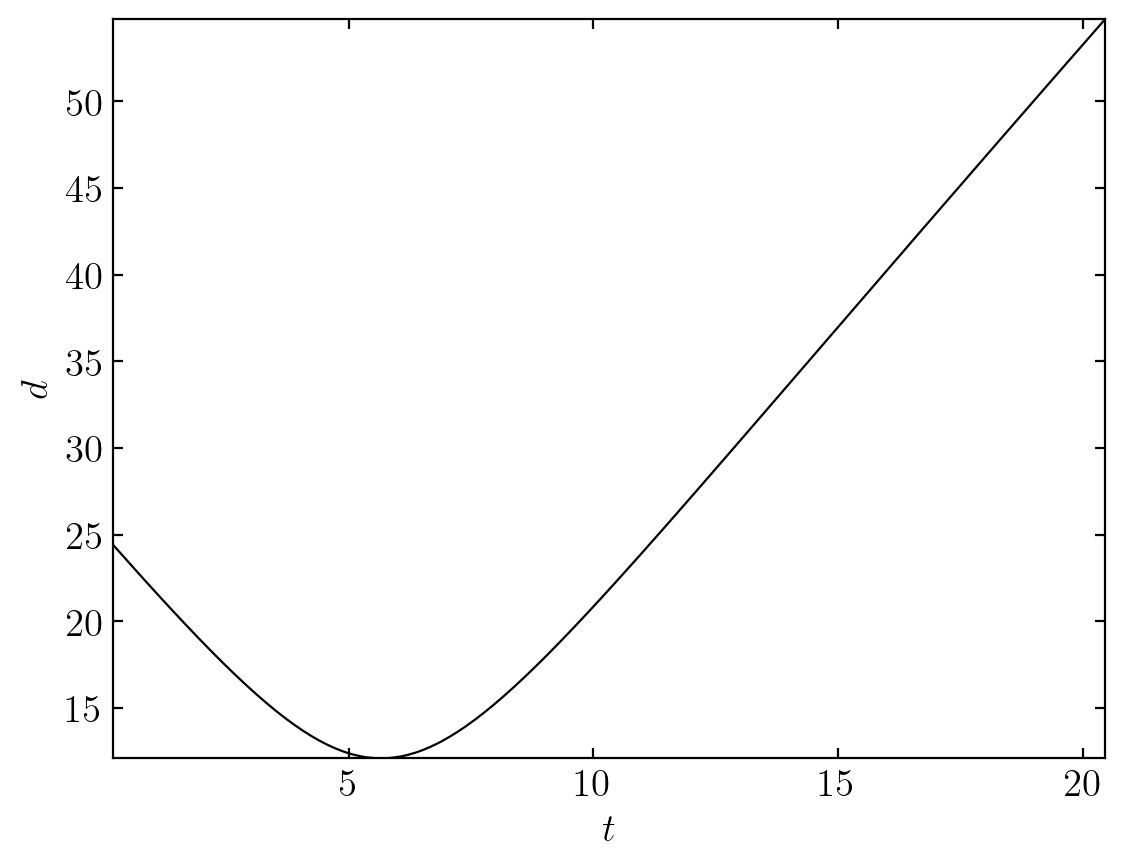

In [5]:
# plotting the distance
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

d = dist(m_1['x'], m_1['y'], m_1['z'], m_2['x'], m_2['y'], m_2['z'])
plt.plot(t, d, c = 'black', lw = .8)

plt.xlabel(r'$t$')
plt.ylabel(r'$d$')

plt.show()

## Omega
To calculate the angular frequency of the binary we use Kepler's 3rd law

$$ \omega = \sqrt{\dfrac{m_1 m_2}{d}} $$

We can use this variable to compute the angular momentum of the system

$$ L = \mu \omega d^2 $$

and the mass normalized angular momentum

$$ l = L/\mu = \omega d^2 $$

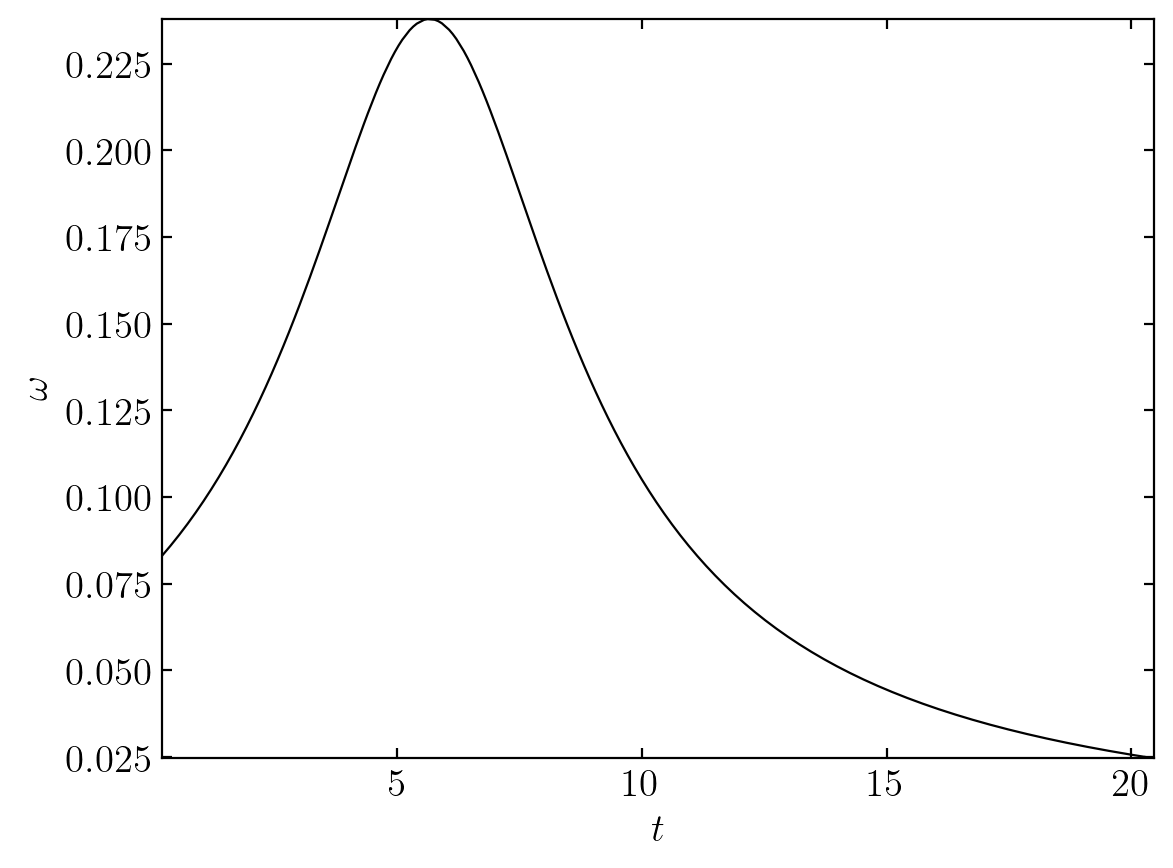

In [6]:
M  = m_1['m'] + m_2['m']
mu = m_1['m'] * m_2['m']/M

omega = np.sqrt(m_1['m']*m_2['m']/d**3) #G=1
L = mu*d**2*omega #constant = sqrt(m_1*m_2)
L = L[0]
l = L/mu

plt.plot(t, omega, c = 'black', lw = .8)

plt.xlabel(r'$t$')
plt.ylabel(r'$\omega$')

plt.show()

## The potential
The most important part, actually showing that the system is indeed unbound. To calculate the total energy we use the coding power to calculate 

$$ E_\text{tot} = \sum_{i} \dfrac{1}{2}m_{i}v_i^2 - \sum_{i \ne j} G\ \dfrac{m_i m_j}{(\vec{r_i} - \vec{r_j})^2} \hat r_{ij} $$

And then we can use the *effective potential* derived by reducing our 3D system to a simple 1D one, by virtue of the *angular momentum conservation* and *energy conservation*. This ***equivalent system*** is represented by a binary system where the center of mass is at the origin and a body with reduced mass $\mu$ is orbiting around it.<br>
Using a bit of calculus one can then rewrite the potential energy in the newfound coordinate system.

$$ U(d) = - \dfrac{m_1m_2}{d} + \dfrac{L^2}{2 \mu d^2}$$

Using our initial conditions we substitute the values of the physical quantities in the total mechanical energy equation and obtain $ E = 4 $, which is exactly what we find

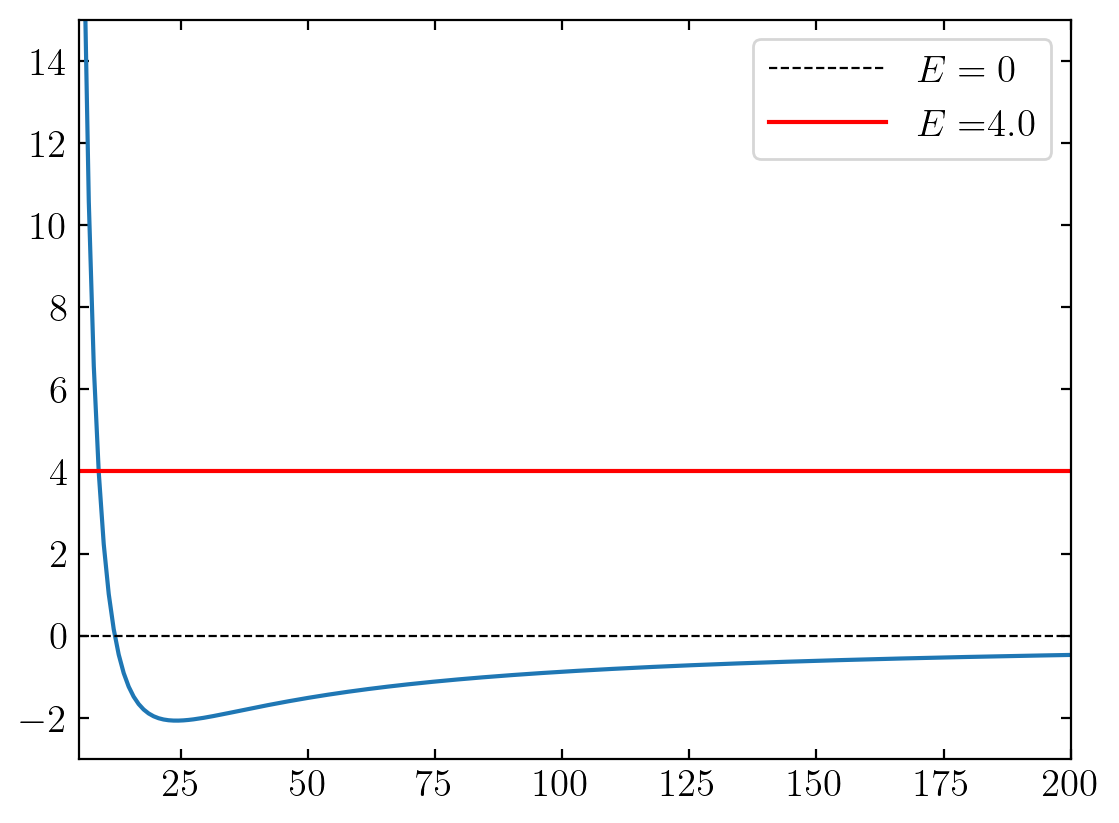

In [7]:
v_1 = np.sqrt(m_1["v_x"]**2 + m_1["v_y"]**2 + m_1["v_z"]**2)
v_2 = np.sqrt(m_2["v_x"]**2 + m_2["v_y"]**2 + m_2["v_z"]**2)
v_cm = 0

U = lambda r: -m_1["m"]*m_2["m"]/r + L**2/(2*mu*r**2)

G = 1
Ek_ = 1/2*m_1["m"]*v_1**2 + 1/2*m_2["m"]*v_2**2 
U_ = -(G*m_1["m"]*m_2["m"]/d)
E = Ek_ + U_  #dovrebbe conservarsi

r = np.linspace(5, 200,len(t))
plt.plot(r, U(r))
plt.ylim(-3,15)

#plt.plot(d, U(d), 'red');
plt.axhline(y = 0, color = 'black', linestyle = 'dashed', lw = .8, label = r'$E = 0$')
plt.axhline(y = E[-1], color = 'red', label = fr'$E = ${round(E[-1], 2)}')
plt.legend();

We can see we don't expect closed orbits, this is because the intersection of the energy of the system (*red line*), which now is just one point (the maximum approach). Since the particle doesn't have enough energy to overcome the potential barrier but still enough to escape the gravitational pull, it's motion is just deflected.

One can then ask if the energy is effectively conserved throughout the entirety of the simulation. Here we show a very interesting result.

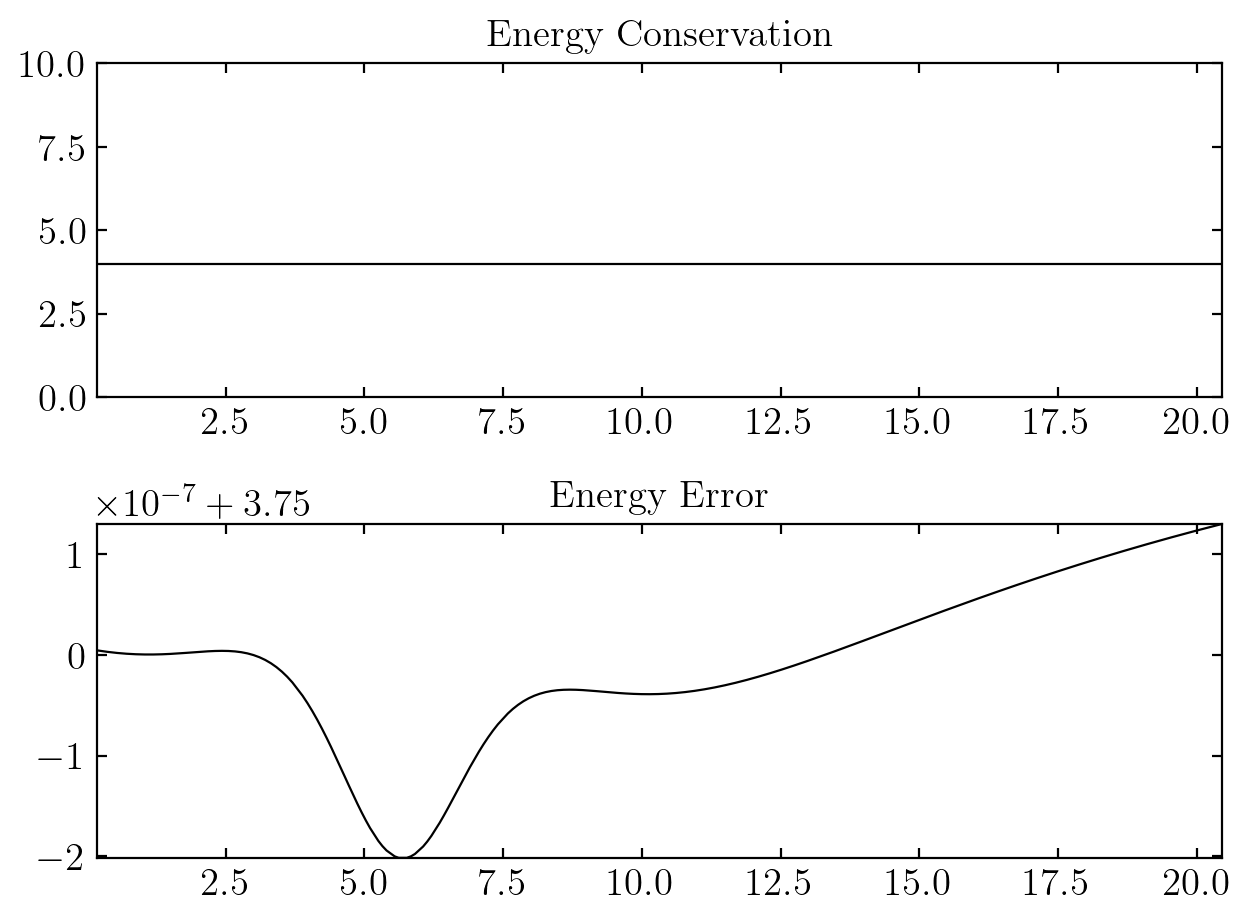

In [8]:
fig, axs = plt.subplots(2)
axs[0].plot(t, E, c = 'black', lw = .8)
axs[0].set_ylim([0, 10])
axs[0].set_title("Energy Conservation")

axs[1].plot(t, E - .25, c = 'black', lw = .8)
axs[1].set_title("Energy Error")

fig.tight_layout(pad=1.0) 
plt.show();

Apparently **energy is conserved within a tiny error**, this probably is a numerical effect, most probably a truncation error of the estimates of the position. Probably due to the fact that the code is precise up to 5th order of the derivatives of the position.

## Eccentricity

To calculate the eccentricity from the equivalent system, we must identify the initial conditions for the general solution

$$ u(\theta) = Acos(\theta - \theta_0) + \frac{GM}{l^2} $$

The Cauchy and Neumann conditions chosen are

$$
\begin{cases}
    u(\theta=0) = 0 \\
    u'(\theta=0) = v_0
\end{cases}
$$

Where $v_0$ is the initial velocity of the approaching particle (the only moving). The choice for the first equation is natural since the particle is approaching from very far, we assume $d \gg 1 $ $ u(0) = \dfrac{1}{d \rightarrow \infty} $ and $d(t = 0) = 1$ 

Let's see how we can solve for $A$ and $\theta_0$ in this case we will keep the term $ \frac{GM}{l^2} = 2$<br>

$$
\begin{cases}
    u(0)= A \cos(\theta_0) = - \dfrac{GM}{l^2}  \\[3mm]
    u'(0) = A \sin(\theta_0) = v_0
\end{cases}
$$

The results are calculated numerically.

Eccentricity is defined by the physical formula 
$$ e = \frac{A l^2}{G M} $$

unfortunately in this case we weren't able to match the theory with the actual calculation, we encourage you to give it a shot.

In [20]:
b = abs(round(m_2["y"][0] - m_1["y"][0]))
v_0 = 4
G = 1
p_vir = v_0*l**2/(G*M)
theta_0 = np.arctan(- p_vir)
print(round(p_vir,2), round(theta_0, 2))

96.64 -1.56


In [21]:
A = v_0/np.sin(theta_0)
print(A)

-4.000214149239739


In [22]:
G = 1
e = A*l**2/(G*M)

print(e)

-96.64383763540144


## Trajectories

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

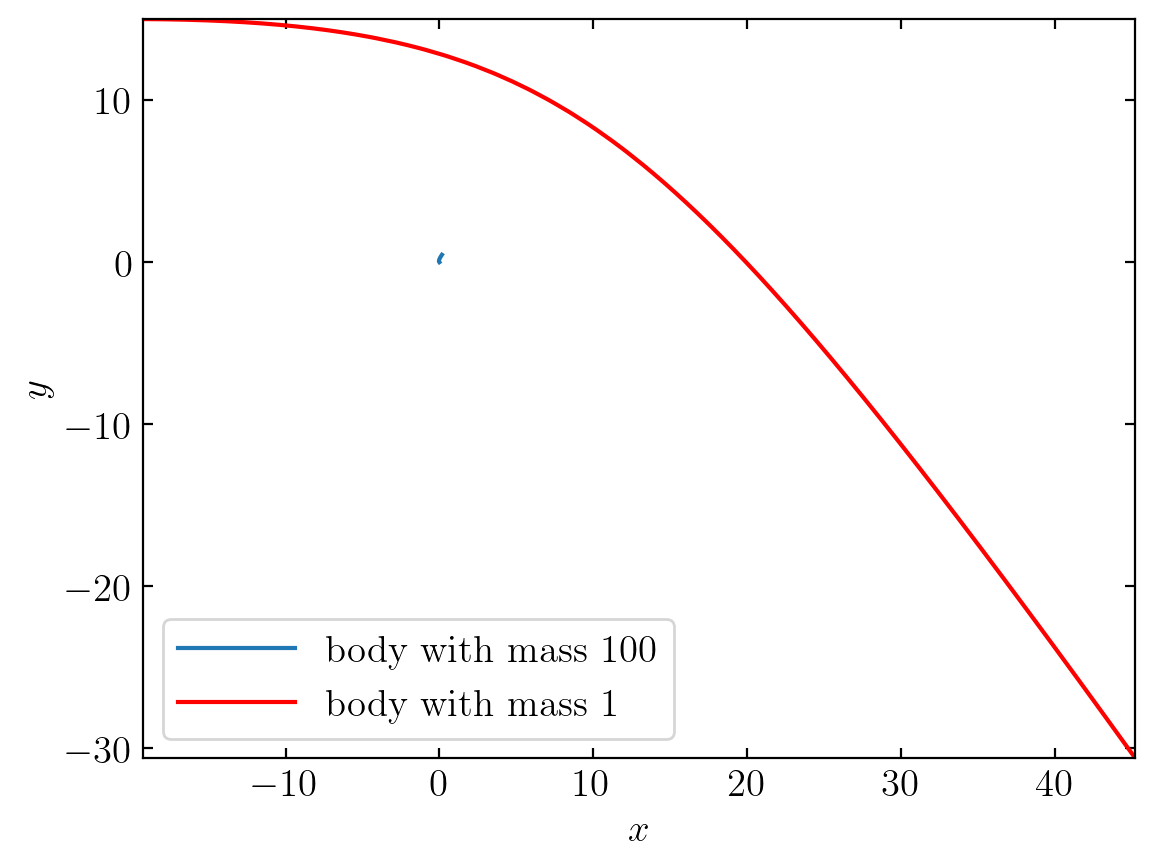

In [13]:
plt.plot(m_1["x"], m_1["y"], label=f'body with mass {round(m_1["m"])}');
plt.plot(m_2["x"], m_2["y"], label=f'body with mass {round(m_2["m"])}', color = 'red');
#plt.xlim(-.6,.6)
#plt.ylim(-.6,.6);

plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.legend();

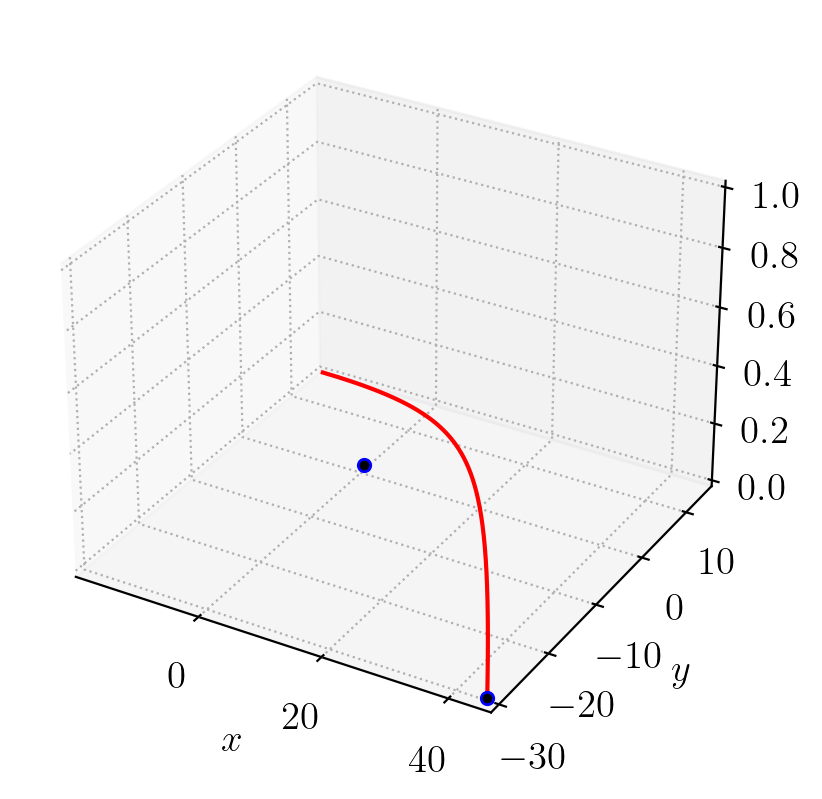

In [14]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(m_1["x"], m_1["y"], m_1["z"], zdir='z', label='curve in (x, y)');
ax.plot(m_2["x"], m_2["y"], m_2["z"], zdir='z', label='curve in (x, y)', color = 'red');
ax.scatter(m_1["x"][-1], m_1["y"][-1], m_1["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin
ax.scatter(m_2["x"][-1], m_2["y"][-1], m_2["z"][-1], 
               c='black', marker = 'o');    # Adding Constant Origin

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');
ax.set_zlim(0,1);

## Deviation angle
<img src="defl.jpeg" width="400" align="right">
<br>
Suppose we have our total mass-reduced mass system (M - $\mu$). Particle $\mu$ is moving towards M with an initial velocity $\vec{v_0}$ and impact parameter $b$. We can define some parameters as the angle $\phi$, the value of the pericenter $r_p$ and the angle $\phi_0$ relative to the position of the pericenter. We can also define the **deviation angle** $\theta$. 

Looking at the figure above we can see that $\theta$ can be written as $\theta = 2 \phi_0 - \pi$.
We want to evaluate the angle $\theta$ depending on the properties of the system (M, $\mu$, b and $\vec{v_0}$).
We know that at the end, the mass $\mu$ will have a velocity $\vec{v_1}$ so that $|\vec{v_1}|=|\vec{v_0}|$.

We can start by writing the equation for the radial coordinate between the two bodies:

$$ \frac{1}{r} = A \cos(\phi - \phi_0) + \frac{GM}{l^2} $$

This is one equation with two unknowns (A and $\phi_0$) and so we need also an equation for the velocities:

$$- \frac{1}{r^2} \dot{r} = - A \sin(\phi - \phi_0) \dot{\phi}\ \longrightarrow \dot{r} = A l \sin(\phi - \phi_0)$$

Where $l = \dot{\phi} r^2$ is the angular momentum per unit mass. 

We can now set the initial conditions: if our particle is coming from the infinity, we can say that at $t \rightarrow -\infty$ we have that $r \rightarrow \infty$ and $\phi \rightarrow 0$.
<br>
<br>

$$
\begin{cases}
    0 = A \cos\phi_0 + \dfrac{GM}{b_0^2 v_0^2}\\[3mm]
    v_0 = A b v_o \sin\phi_0\ \longrightarrow \ A = \dfrac{1}{b \sin\phi_0}
\end{cases}
$$
<br>
<br>
In this way we can find that 
$$\phi_0 = - \frac{b v_0^2}{GM}$$
and saw we can easily compute $\theta$. 

The quantity $\frac{b v_0^2}{GM}$ is called *virial parameter* and it tells us how strong is the interaction: larger velocity means a weaker interaction and a larger mass means stronger interaction.

We can also say that the components of the final velocity (parallel and perpendicular to the initial direction of motion can be written rispectively as $v_0 \cos\theta$ and $v_0 \sin\theta$ and in this way we can study the effects of the interactions on the components of the velocity.

In [15]:
b = round(m_2["y"][0] - m_1["y"][0])
v_0 = 4
G = 1
phi_0 = np.arctan(- b*v_0**2/(G*M))
theta = 2*phi_0 - np.pi

a = m_2["y"][-1] - m_2["y"][50]
b = m_2["x"][-1] - m_2["x"][50]
m = abs(a/b)

print("dev.angle =", theta + 2*np.pi)
print("angular coeff. =", m)
print("geometric =", np.arctan(m))

dev.angle = 0.7966723130957192
angular coeff. = 0.9960479893701895
geometric = 0.7834182483418931


Finally, to prove that this result makes sense we 'roughly' computed the tangent to the deflected trajectory and computed its angular coefficient $m$. From there one can simply compute the angle of the tangent since $\tan{\alpha} = m$.

The result we find with this simple approximation actually resembles the value expected.

## Animation
Code for the animation shown.

In [16]:
x_1 = m_1["x"]
y_1 = m_1["y"]
z_1 = m_1["z"]

x_2 = m_2["x"]
y_2 = m_2["y"]
z_2 = m_2["z"]

numDataPoints = len(t)

In [17]:
def update(num):
    #print(f"{num} ", end="")
    
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(x_1[:num+1], y_1[:num+1], 
              z_1[:num+1])              # Updating Point Location
    ax.plot3D(x_2[:num+1], y_2[:num+1], 
              z_2[:num+1], c='red')
    ax.scatter(x_1[num], y_1[num], z_1[num], 
               c='black', marker='o')    # Adding Constant Origin
    ax.scatter(x_2[num], y_2[num], z_2[num], 
               c='black', marker='o')    # Adding Constant Origin
    
    #ax.plot3D(x_1[0], y_1[0], z_1[0], marker='o', c='black')    # Setting Axes Limits
    #ax.plot3D(x_2[0], y_2[0], z_2[0], marker='o', c='black')    # Setting Axes Limits
    
    ax.set_xlim3d([-19, 50])
    ax.set_ylim3d([-35, 19])
    ax.set_zlim3d([0, 2])
    # Adding Figure Labels
    #ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 #decimals=2)) + ' sec')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$');

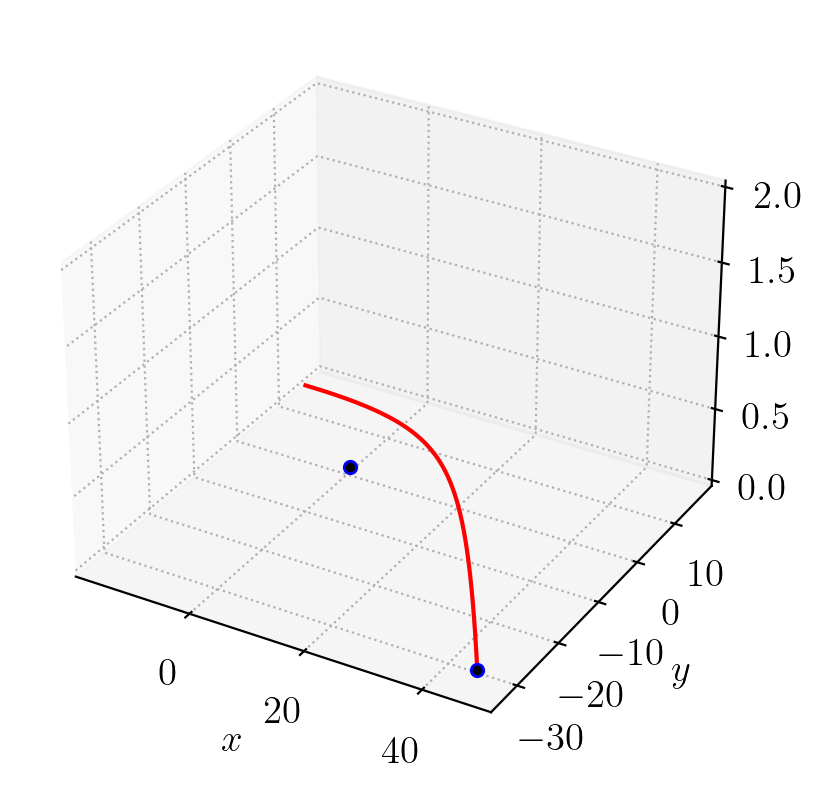

In [18]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update, interval=10,   
                                   frames=numDataPoints)

# Saving the Animation
f = r"animation_u.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()